#                        CREDIT EDA CASE STUDY




GROUP MEMBERS:- 1. Laxmi Sahu (laxmisahu56@gmail.com) 
                   2. Sushant Yadav (sushant09yadav@gmail.com)

Objective :- This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

## 1. IMPORTING LIBRARIES

In [1]:
# Importing the used library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Import warnings removers
import warnings
warnings.filterwarnings('ignore')
import itertools

## 2. IMPORTING DATAFRAMES

In [3]:
# Reading current application dataset
current_application=pd.read_csv('application_data.csv')

In [4]:
# Reading Previous Application dataset
previous_application = pd.read_csv('previous_application.csv')

### 2.1 EXAMINING THE APPLICATION DATA

In [5]:
# Checking the shape of data
print("Current application:", current_application.shape)

Current application: (307511, 122)


In [6]:
# Checking the column-wise information  
current_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
# Checking the summary of numeric columns 
current_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
# Checking the first five rows of data
current_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.2 EXAMINING THE PREVIOUS DATA

In [9]:
# Checking the shape of previous data
print("Previous application:", previous_application.shape)

Previous application: (1670214, 37)


In [10]:
# Checking the column-wise informtion 
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [11]:
# Checking the summary of numeric columns
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [12]:
# Checking the first five rows of data
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## 3. DATA QUALITY CHECK

### 3.1 DATA CLEANING - PERCENTAGE OF MISSING VALUES IN PREVIOUS APPLICATION

In [13]:
# Calculating percentage of missing values in each column of previous application dataset using isnull(),sum(),len() and round()
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

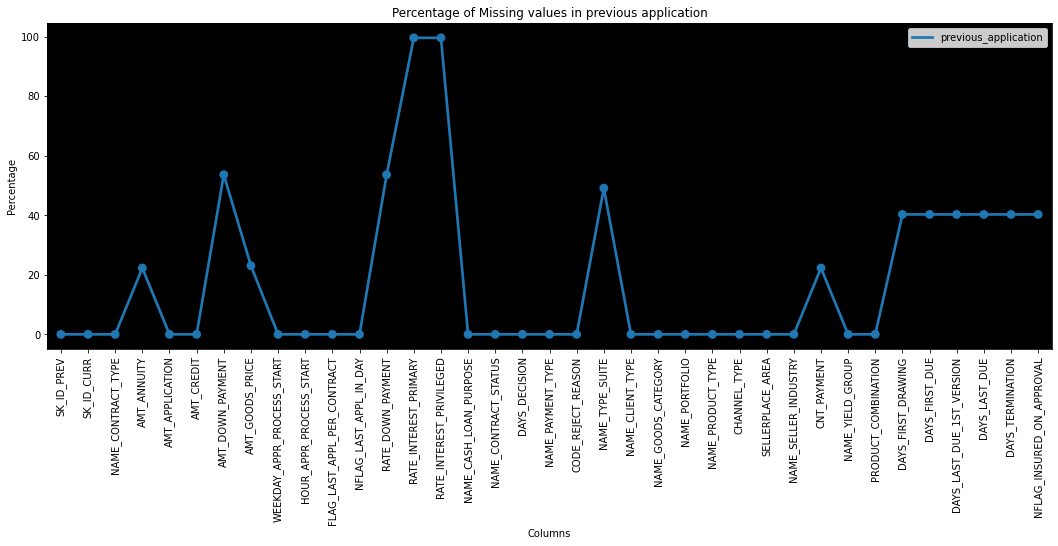

In [14]:
# Plotting percentage of Missing values using seaborn pointplot
fig = plt.figure(figsize=(18,6))
miss_previous_app = pd.DataFrame((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()
ax = sns.pointplot('index',0,data=miss_previous_app)
plt.xticks(rotation =90)
plt.title("Percentage of Missing values in previous application")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.legend(['previous_application'])
ax.set_facecolor('k')
fig.set_facecolor('white')

### 3.1.1 REMOVING COLUMNS WITH MISSING VALUES MORE THEN  50%

**MAIN POINT** :- As per the industrial standards, the maximum threshold limit can be between 40% - 50% depending upon the data acquired in specific sector. therefore, removing columns having Missing values above 50%. 

In [15]:
previous_application = previous_application.drop([ 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       "RATE_INTEREST_PRIVILEGED"],axis=1)

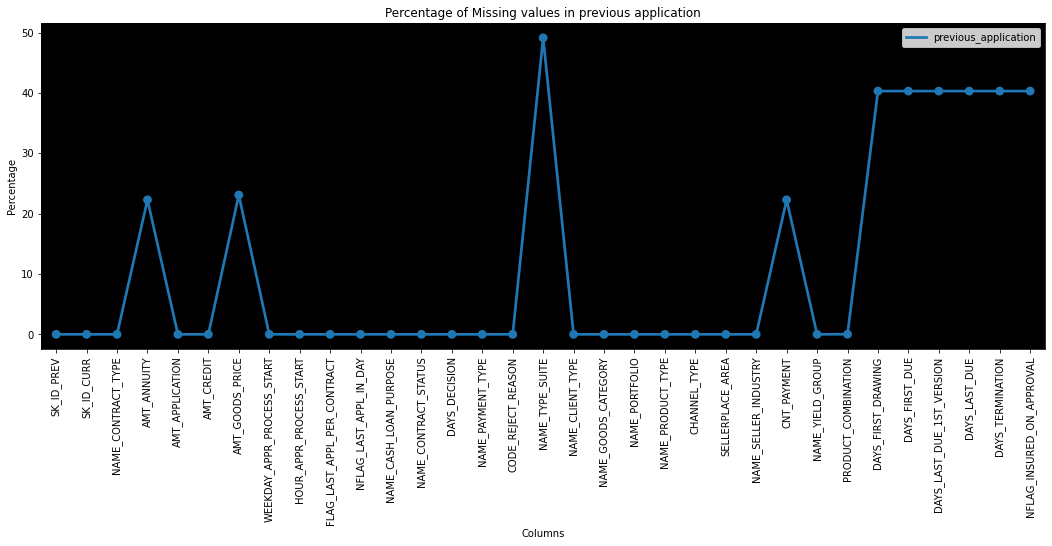

In [16]:
fig = plt.figure(figsize=(18,6))
miss_previous_app = pd.DataFrame((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()
ax = sns.pointplot('index',0,data=miss_previous_app)
plt.xticks(rotation =90)
plt.title("Percentage of Missing values in previous application")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.legend(['previous_application'])
ax.set_facecolor('k')
fig.set_facecolor('white')

### 3.1.2 APPROCH AND SUGGESTION FOR IMPUTING MISSING VALUES IN PREVIOUS     APPLICATION DATA

In [17]:
# null values in AMT_ANNUITY Column
print("Null Values in AMT_ANNUITY Column : ", previous_application['AMT_ANNUITY'].isnull().sum())

Null Values in AMT_ANNUITY Column :  372235


In [18]:
previous_application['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

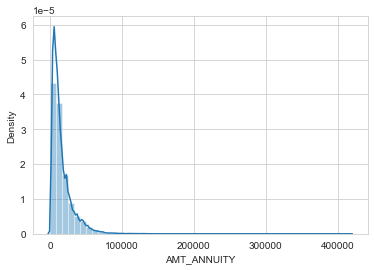

In [19]:
# Plotting displot to check the values distribution of AMT_ANNUITY column
sns.set_style('whitegrid') 
sns.distplot(previous_application['AMT_ANNUITY']) 
plt.show()

**SUGGESTION:-** As the displot is right skewed and amount could be a float value, therefore we can impute the Null values in AMT_ANNUITY column with mean value.

In [20]:
# null values in AMT_GOODS_PRICE Column
print("Null values in AMT_GOODS_PRICE column :" ,previous_application['AMT_GOODS_PRICE'].isnull().sum())


Null values in AMT_GOODS_PRICE column : 385515


In [21]:
previous_application['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

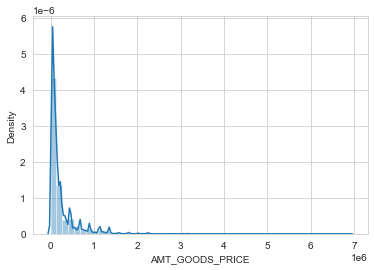

In [22]:
sns.set_style('whitegrid') 
sns.distplot(previous_application['AMT_GOODS_PRICE']) 
plt.show()

**SUGGESTION:-** As the displot is right skewed and values are more distributed, therefore we can impute the Null values in AMT_GOODS_PRICE column with median value.

In [23]:
# null values in NAME_TYPE_SUITE Column
print("Null values in NAME_TYPE_SUITE column :", previous_application['NAME_TYPE_SUITE'].isnull().sum())


Null values in NAME_TYPE_SUITE column : 820405


In [24]:
previous_application['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

**SUGGESTION:-** As the NAME_TYPE_SUITE is a categorical variable, therefore, we can impute null values with 'Unaccompanied', here it is mode of NAME_TYPE_SUITE.

### CHECKING FOR OUTLIERS

In [25]:
# null values in CNT_PAYMENT Column
print("Null values in CNT_PAYMENT column :", previous_application['CNT_PAYMENT'].isnull().sum())

Null values in CNT_PAYMENT column : 372230


In [26]:
previous_application['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

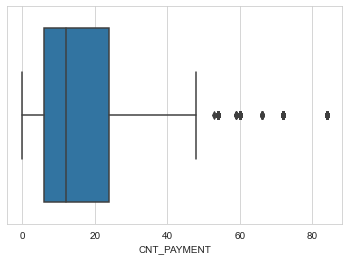

In [27]:
# Plotting boxplot to check values distribution of CNT_PAYMENT column 
sns.set_style('whitegrid') 
sns.boxplot(previous_application['CNT_PAYMENT']) 
plt.show()

**SUGGESTION:-** As some of the amount are as outliers and if we take mean then mean will not be a true representation of data, therefore, imputing null values with median values.

In [28]:
# null values in DAYS_FIRST_DRAWING Column
print("Null values in DAYS_FIRST_DRAWING column:", previous_application['DAYS_FIRST_DRAWING'].isnull().sum())

Null values in DAYS_FIRST_DRAWING column: 673065


In [29]:
previous_application['DAYS_FIRST_DRAWING'].describe()

count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

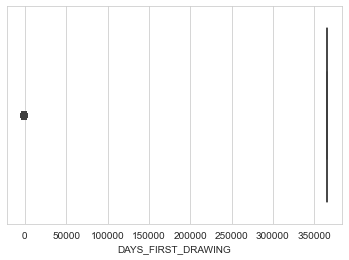

In [30]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_FIRST_DRAWING']) 
plt.show()

**SUGGESTION:-** As some of the amount are as outliers and if we take mean then mean will not be a true representation of data, therefore, imputing null values with median values.

In [31]:
# null values in DAYS_FIRST_DUE Column
print("Null values in DAYS_FIRST_DUE column:", previous_application['DAYS_FIRST_DUE'].isnull().sum())

Null values in DAYS_FIRST_DUE column: 673065


In [32]:
previous_application['DAYS_FIRST_DUE'].describe()

count    997149.000000
mean      13826.269337
std       72444.869708
min       -2892.000000
25%       -1628.000000
50%        -831.000000
75%        -411.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

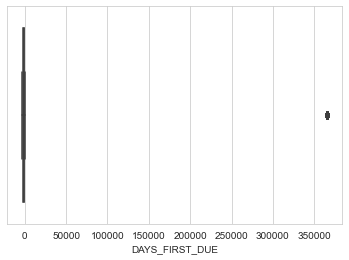

In [33]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_FIRST_DUE']) 
plt.show()

**SUGGESTON:-** As some of the amount are as outliers and if we take mean then mean will not be a true representation of data, therefore, imputing null values with median values.

In [34]:
# null values in DAYS_LAST_DUE_1ST_VERSION
print("Null values in DAYS_LAST_DUE_1ST_VERSION column :", previous_application['DAYS_LAST_DUE_1ST_VERSION'].isnull().sum())

Null values in DAYS_LAST_DUE_1ST_VERSION column : 673065


In [35]:
previous_application['DAYS_LAST_DUE_1ST_VERSION'].describe()

count    997149.000000
mean      33767.774054
std      106857.034789
min       -2801.000000
25%       -1242.000000
50%        -361.000000
75%         129.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

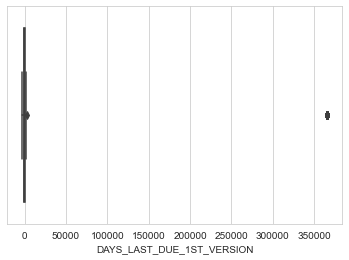

In [36]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_LAST_DUE_1ST_VERSION']) 
plt.show()

**SUGGESTION:-** As some of the amount are as outliers and if we take mean then mean will not be a true representation of data, therefore, imputing null values with median values.



In [37]:
# Null values in DAYS_LAST_DUE column
print("Null values in DAYS_LAST_DUE column :", previous_application['DAYS_LAST_DUE'].isnull().sum())

Null values in DAYS_LAST_DUE column : 673065


In [38]:
previous_application['DAYS_LAST_DUE'].describe()

count    997149.000000
mean      76582.403064
std      149647.415123
min       -2889.000000
25%       -1314.000000
50%        -537.000000
75%         -74.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64

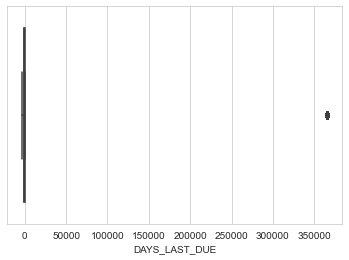

In [39]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_LAST_DUE']) 
plt.show()

**SUGGESTION:-** As some of the amount are as outliers and if we take mean then mean will not be a true representation of data, therefore, imputing null values with median values.

In [40]:
# Null values in DAYS_TERMINATION column
print("Null values in DAYS_TERMINATION column :", previous_application['DAYS_TERMINATION'].isnull().sum())

Null values in DAYS_TERMINATION column : 673065


In [41]:
previous_application['DAYS_TERMINATION'].describe()

count    997149.000000
mean      81992.343838
std      153303.516729
min       -2874.000000
25%       -1270.000000
50%        -499.000000
75%         -44.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

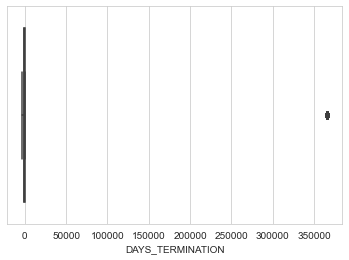

In [42]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_TERMINATION']) 
plt.show()

**SUGGESTION:-** As some of the amount are as outliers and if we take mean then mean will not be a true representation of data, therefore, imputing null values with median values.

In [43]:
# Null Values in NFLAG_INSURED_ON_APPROVAL column
print("Null values in NFLAG_INSURED_ON_APPROVAL column :", previous_application['NFLAG_INSURED_ON_APPROVAL'].isnull().sum())

Null values in NFLAG_INSURED_ON_APPROVAL column : 673065


In [44]:
previous_application['NFLAG_INSURED_ON_APPROVAL'].value_counts()

0.0    665527
1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

**SUGGESTION:-** Imputing null values with 0, as 0 is mode for this variable.

In [45]:
previous_application['NFLAG_INSURED_ON_APPROVAL'].isnull().sum()

673065

In [46]:
# Null values in AMT_CREDIT column
print("Null values in AMT_CREDIT column :", previous_application['AMT_CREDIT'].isnull().sum())

Null values in AMT_CREDIT column : 1


In [47]:
previous_application['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

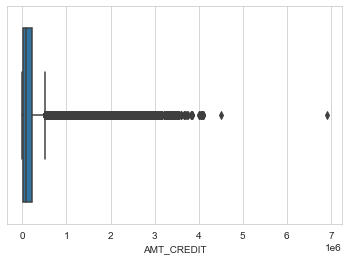

In [48]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['AMT_CREDIT']) 
plt.show()

**SUGGESTION:-** As some of the amount are as outliers and if we take mean then mean will not be a true representation of data, therefore, imputing null values with median values.

In [49]:
# Null values in PRODUCT_COMBINATION column
print("Null values in PRODUCT_COMBINATION column :", previous_application['PRODUCT_COMBINATION'].isnull().sum())

Null values in PRODUCT_COMBINATION column : 346


In [50]:
previous_application['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

**SUGGESTION:-** Imputing null values with cash, as cash is mode for this variable.

### 3.1.3 CORRECTING THE DATA TYPES OF COLUMNS IN PREVIOUS APPLICATION DATA

In [51]:
previous_application['DAYS_FIRST_DRAWING']=previous_application['DAYS_FIRST_DRAWING'].astype(int, errors='ignore')
previous_application['DAYS_LAST_DUE_1ST_VERSION']=previous_application['DAYS_LAST_DUE_1ST_VERSION'].astype(int, errors='ignore')
previous_application['DAYS_LAST_DUE']=previous_application['DAYS_LAST_DUE'].astype(int, errors='ignore')
previous_application['DAYS_TERMINATION']=previous_application['DAYS_TERMINATION'].astype(int, errors='ignore')

### 3.2 DATA CLEANING - PERCENTAGE OF MISSING VALUES IN CURRENT APPLICATION DATA

In [52]:
#Calculating percentage of missing values in each column of previous application dataset using isnull(),sum(),len() and round()
round(100*(current_application.isnull().sum()/len(current_application.index)),2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

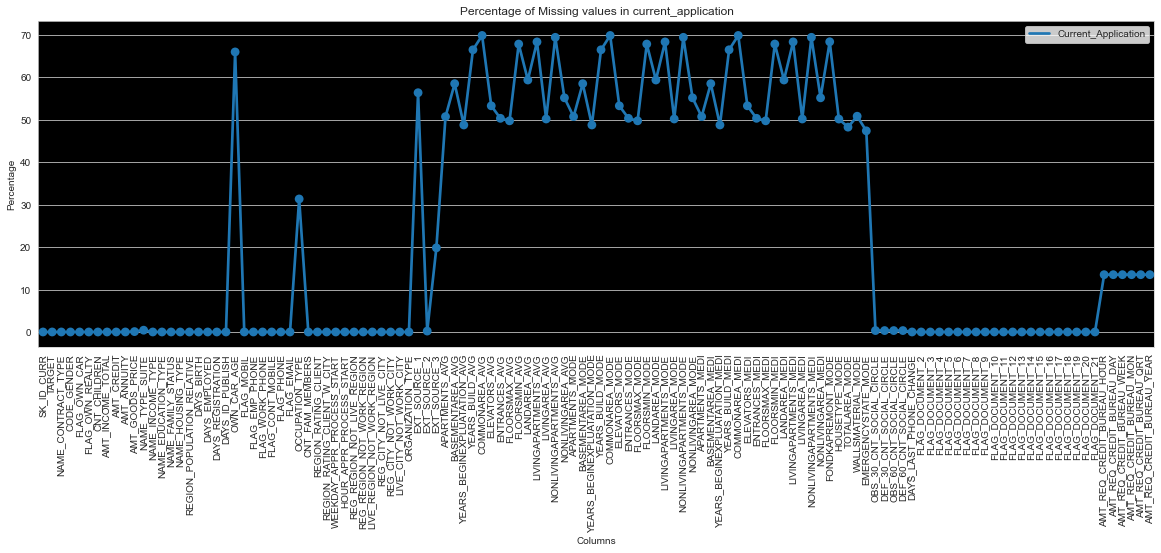

In [53]:
fig = plt.figure(figsize=(20,6))
miss_current_application = pd.DataFrame((current_application.isnull().sum())*100/current_application.shape[0]).reset_index()
ax = sns.pointplot("index",0,data=miss_current_application)
plt.xticks(rotation =90)
plt.title("Percentage of Missing values in current_application")
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.legend(['Current_Application'])
ax.set_facecolor('k')
fig.set_facecolor('white')

### 3.2.1 REMOVING COLUMNS WITH MISSING VALUES MORE THEN 50%

**MAIN POINT:-** As per Industrial Standard, maximum threshold limit can be between 40% to 50 % depending upon the data acquired in specific sector, therefore removing columns with missing values above 50%.  

In [54]:
for i in current_application.columns:
    if (round(100*(current_application[i].isnull().sum()/len(current_application[i].index)),2)) >= 50.00 :
        current_application = current_application.drop([i], axis=1)
current_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


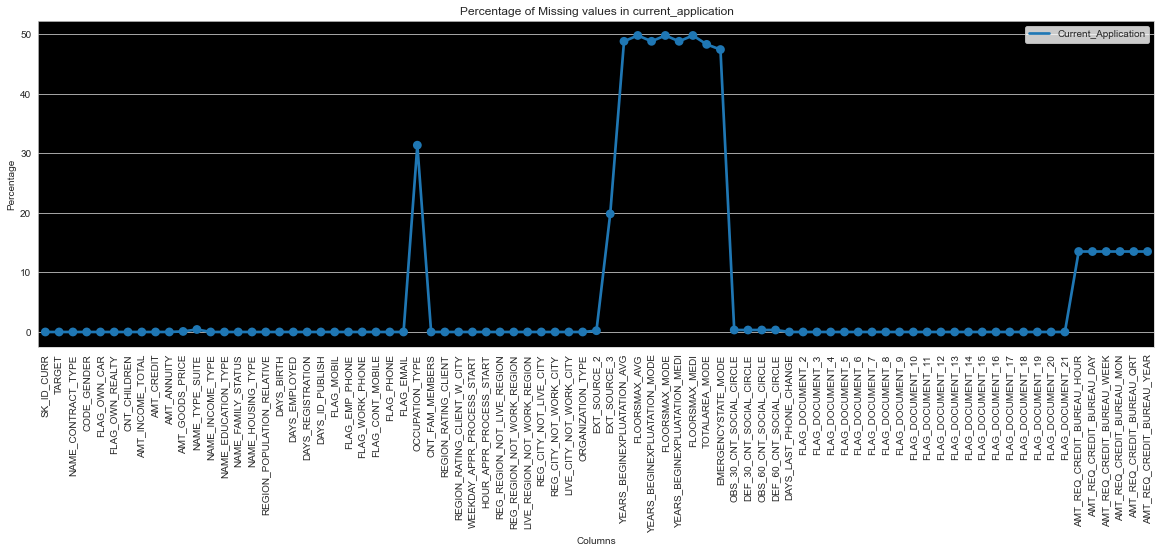

In [55]:
fig = plt.figure(figsize=(20,6))
miss_current_application = pd.DataFrame((current_application.isnull().sum())*100/current_application.shape[0]).reset_index()
ax = sns.pointplot("index",0,data=miss_current_application)
plt.xticks(rotation =90)
plt.title("Percentage of Missing values in current_application")
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.legend(['Current_Application'])
ax.set_facecolor('k')
fig.set_facecolor('white')

### 3.2.2 APPROCH & AUGGESTION FRO IMPUTTING MISSING VALUES IN PREVIOUS APPLICATION DATA

In [56]:
# Null values in AMT_REQ_CREDIT_BUREAU_DAY NAN COUNT column
print("Null values in AMT_REQ_CREDIT_BUREAU_DAY NAN COUNT :", current_application['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())

Null values in AMT_REQ_CREDIT_BUREAU_DAY NAN COUNT : 41519


In [57]:
current_application['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

**SUGGESTION:-** as the mean is showing 0.007 which is very much near to zero, therefore values of the column are distributed around zero. Hence imputing the null vales with median value of the column.

In [58]:
#Null values in AMT_REQ_CREDIT_BUREAU_HOUR NAN COUNT 
print("Null values in AMT_REQ_CREDIT_BUREAU_HOUR :", current_application['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum())

Null values in AMT_REQ_CREDIT_BUREAU_HOUR : 41519


In [59]:
current_application['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

**SUGGESTION:-** as the mean is showing 0.0064 which is very much near to zero, therefore values of the column are distributed around zero. Hence imputing the null vales with median value of the column.

In [60]:
current_application['AMT_REQ_CREDIT_BUREAU_HOUR'] = current_application['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(current_application['AMT_REQ_CREDIT_BUREAU_HOUR'].median())

In [61]:
#Null values in AMT_REQ_CREDIT_BUREAU_MON column
print("Null values in AMT_REQ_CREDIT_BUREAU_MON :", current_application['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum())

Null values in AMT_REQ_CREDIT_BUREAU_MON : 41519


In [62]:
current_application['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

**SUGGSTION:-** Imputing missing values with median of column.

In [63]:
# Null values in AMT_REQ_CREDIT_BUREAU_QRT column
print("Null values in AMT_REQ_CREDIT_BUREAU_QRT :", current_application['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum())

Null values in AMT_REQ_CREDIT_BUREAU_QRT : 41519


In [64]:
current_application['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

**SUGGESTION:-** Imputing missing values with median of column.

In [65]:
# Null values in AMT_REQ_CREDIT_BUREAU_WEEK column
print("Null values in AMT_REQ_CREDIT_BUREAU_WEEK :", current_application['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum())

Null values in AMT_REQ_CREDIT_BUREAU_WEEK : 41519


In [66]:
current_application['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

**SUGGESTION:-** Imputing missing values with median of column.

In [67]:
# Null values in AMT_REQ_CREDIT_BUREAU_YEAR column
print("Null values in AMT_REQ_CREDIT_BUREAU_YEAR :", current_application['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum())

Null values in AMT_REQ_CREDIT_BUREAU_YEAR : 41519


In [68]:
current_application['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

**SUGGESTION:-** Imputing missing values with median of column.

In [69]:
# Null values in DEF_30_CNT_SOCIAL_CIRCLE column
print("Null values in DEF_30_CNT_SOCIAL_CIRCLE :", current_application['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum())

Null values in DEF_30_CNT_SOCIAL_CIRCLE : 1021


In [70]:
current_application['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

**SUGGESTION:-** Imputing missing values with median of column.

In [71]:
# Null values in OBS_30_CNT_SOCIAL_CIRCLE column
print("Null values in OBS_30_CNT_SOCIAL_CIRCLE :", current_application['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum())

Null values in OBS_30_CNT_SOCIAL_CIRCLE : 1021


In [72]:
current_application['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

**SUGGESTION:-** Imputing missing values with median of column.

In [73]:
# Null values in OBS_60_CNT_SOCIAL_CIRCLE column
print("Null values in OBS_60_CNT_SOCIAL_CIRCLE :", current_application['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum())

Null values in OBS_60_CNT_SOCIAL_CIRCLE : 1021


In [74]:
current_application['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

**SUGGESTION:-** Imputing missing values with median of column.

In [75]:
# Null values in DEF_60_CNT_SOCIAL_CIRCLE column
print("Null values in DEF_60_CNT_SOCIAL_CIRCLE :", current_application['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum())

Null values in DEF_60_CNT_SOCIAL_CIRCLE : 1021


In [76]:
current_application['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

**SUGGESTION:-** Imputing missing values with median of column.

In [77]:
# Null values in AMT_ANNUITY column
print("Null values in AMT_ANNUITY  :", current_application['AMT_ANNUITY'].isnull().sum())

Null values in AMT_ANNUITY  : 12


In [78]:
current_application['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

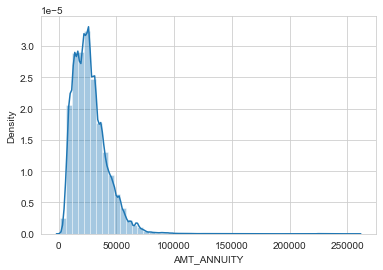

In [79]:
sns.set_style('whitegrid') 
sns.distplot(current_application['AMT_ANNUITY']) 
plt.show()

**SUGGESTION:-** As it is a symmetrical plot, therefore we can impute missing values with mean value of column.

In [80]:
# Null values in AMT_GOODS_PRICE column
print("Null values in AMT_GOODS_PRICE   :", current_application['AMT_GOODS_PRICE'].isnull().sum())

Null values in AMT_GOODS_PRICE   : 278


In [81]:
current_application['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

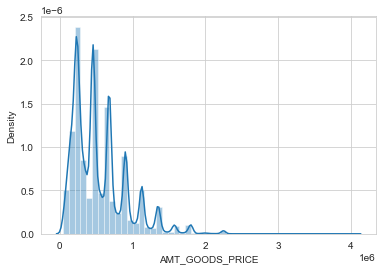

In [82]:
sns.set_style('whitegrid') 
sns.distplot(current_application['AMT_GOODS_PRICE']) 
plt.show()

**SUGGESTION:-** As it is a right skewed distribution, therefore imputing missing values with mean value of column.

In [83]:
# Null values in NAME_TYPE_SUITE column
print("Null values in NAME_TYPE_SUITE :", current_application['NAME_TYPE_SUITE'].isnull().sum())

Null values in NAME_TYPE_SUITE : 1292


In [84]:
current_application['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

**SUGGESTION:-** As it is a categorical variable, therefore imputing missing values with 'unaccompanied' mode for the column.

In [85]:
# Null values in CNT_FAM_MEMBERS column
print("Null values in CNT_FAM_MEMBERS :", current_application['CNT_FAM_MEMBERS'].isnull().sum())

Null values in CNT_FAM_MEMBERS : 2


In [86]:
current_application['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

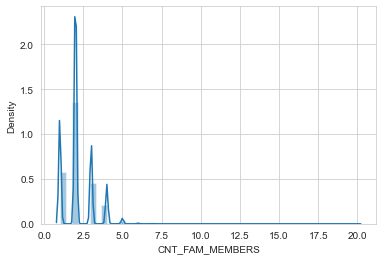

In [87]:
sns.set_style('whitegrid') 
sns.distplot(current_application['CNT_FAM_MEMBERS']) 
plt.show()

**SUGGESTION:-** As it needs to be a whole value, therefore, imputing missing values with median as mean is not a whole value here.

In [88]:
# Null values in DAYS_LAST_PHONE_CHANGE column
print("Null values in DAYS_LAST_PHONE_CHANGE :", current_application['DAYS_LAST_PHONE_CHANGE'].isnull().sum())

Null values in DAYS_LAST_PHONE_CHANGE : 1


In [89]:
current_application['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

***Suggestion:-*** Imputing missing values with mode of the column

### 3.2.3 CORRECTING THE DATA TYPES OF COLUMNS IN CURRENT APPLICATION DATA

In [90]:
current_application['DAYS_REGISTRATION']=current_application['DAYS_REGISTRATION'].astype(int, errors='ignore')
current_application['CNT_FAM_MEMBERS']=current_application['CNT_FAM_MEMBERS'].astype(int, errors='ignore')
current_application['OBS_30_CNT_SOCIAL_CIRCLE']=current_application['OBS_30_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')
current_application['DEF_30_CNT_SOCIAL_CIRCLE']=current_application['DEF_30_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')
current_application['OBS_60_CNT_SOCIAL_CIRCLE']=current_application['OBS_60_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')
current_application['DEF_60_CNT_SOCIAL_CIRCLE']=current_application['DEF_60_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')
current_application['AMT_REQ_CREDIT_BUREAU_HOUR']=current_application['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int, errors='ignore')
current_application['AMT_REQ_CREDIT_BUREAU_DAY ']=current_application['AMT_REQ_CREDIT_BUREAU_DAY'].astype(int, errors='ignore')
current_application['AMT_REQ_CREDIT_BUREAU_WEEK']=current_application['AMT_REQ_CREDIT_BUREAU_WEEK'].astype(int, errors='ignore')
current_application['AMT_REQ_CREDIT_BUREAU_MON']=current_application['AMT_REQ_CREDIT_BUREAU_MON'].astype(int, errors='ignore')
current_application['AMT_REQ_CREDIT_BUREAU_QRT']=current_application['AMT_REQ_CREDIT_BUREAU_QRT'].astype(int, errors='ignore')
current_application['AMT_REQ_CREDIT_BUREAU_YEAR']=current_application['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int, errors='ignore')

### 3.2.4 CONVERTING NEGATIVE VALUES TO ABSOLUTE VALUES

In [91]:
current_application['DAYS_BIRTH'] = abs(current_application['DAYS_BIRTH'])
current_application['DAYS_ID_PUBLISH'] = abs(current_application['DAYS_ID_PUBLISH'])
current_application['DAYS_ID_PUBLISH'] = abs(current_application['DAYS_ID_PUBLISH'])
current_application['DAYS_LAST_PHONE_CHANGE'] = abs(current_application['DAYS_LAST_PHONE_CHANGE'])

In [92]:
current_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_DAY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 4. CONCATINATING THE CURRENT_APPLICATION AND PREVIOUS_APPLICATION DATA

In [93]:
current_application_x = current_application[[x for x in current_application.columns if x not in ['TARGET']]]
previous_application_x = previous_application[[x for x in previous_application.columns if x not in ['TARGET']]]
current_application_x['type'] = "current_application"
previous_application_x['type'] = "previous_application"
df = pd.concat([current_application_x,previous_application_x],axis=0) 
df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,297000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 5. DATA ANALYSIS

### 5.1 IMBALANCE PERCENATGE

**DISTRIBUTION OF TARGET VARIABLE**

TARGET :- Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in sample, 0 - all other cases)

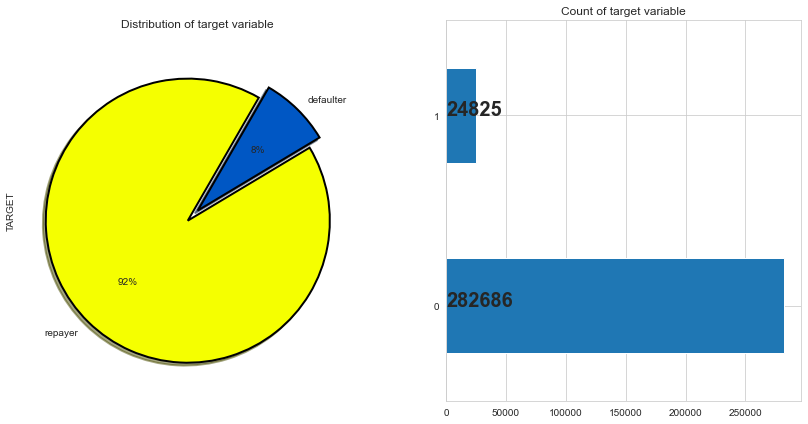

In [94]:
plt.figure(figsize=(14,7))
plt.subplot(121)
current_application["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),
 startangle = 60,labels=["repayer","defaulter"], wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")


plt.subplot(122)
ax = current_application["TARGET"].value_counts().plot(kind="barh")

for i,j in enumerate(current_application["TARGET"].value_counts().values):
     ax.text(.7,i,j,weight = "bold",fontsize=20)
     plt.title("Count of target variable")
plt.show()

***Inference:-*** There are 8% out of total client population has problem in repaying loan.

###  5.2 UNIVARIATE ANALYSIS

**5.2.1 DISTRIBUTION OF CONTRACT TYPE - CURRENT APPLICATION**

Text(0.5, 1.0, 'distribution of contract types in current_application')

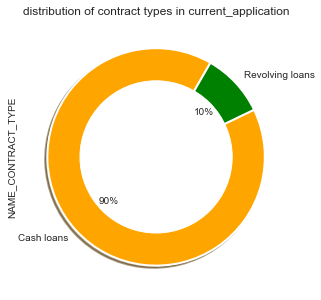

In [95]:
plt.figure(figsize=(7,5))
current_application["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",
colors = ["orange","green"],startangle = 60, wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("distribution of contract types in current_application")


**INFERENCE:-** 2 types of contracts are there, out of which 90% are cash loans.

**5.2.2 GENDER DISTRIBUTION IN CURRENT APPLICATION**

Text(0.5, 1.0, 'Distribution of target variable')

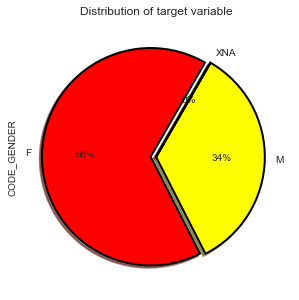

In [96]:
plt.figure(figsize=(7,5))
current_application["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%", colors=['red', 'yellow'],
 startangle = 60, wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of target variable")



**INFERENCES:-** Female clients form 66% part of current application data.

 **5.2.3 DISTRIBUTION OF INCOME**

AMT_INCOME_TOTAL - Income of the client

AMT_CREDIT - Credit amount of the loan

AMT_ANNUITY - Loan annuity

AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which the loan is given

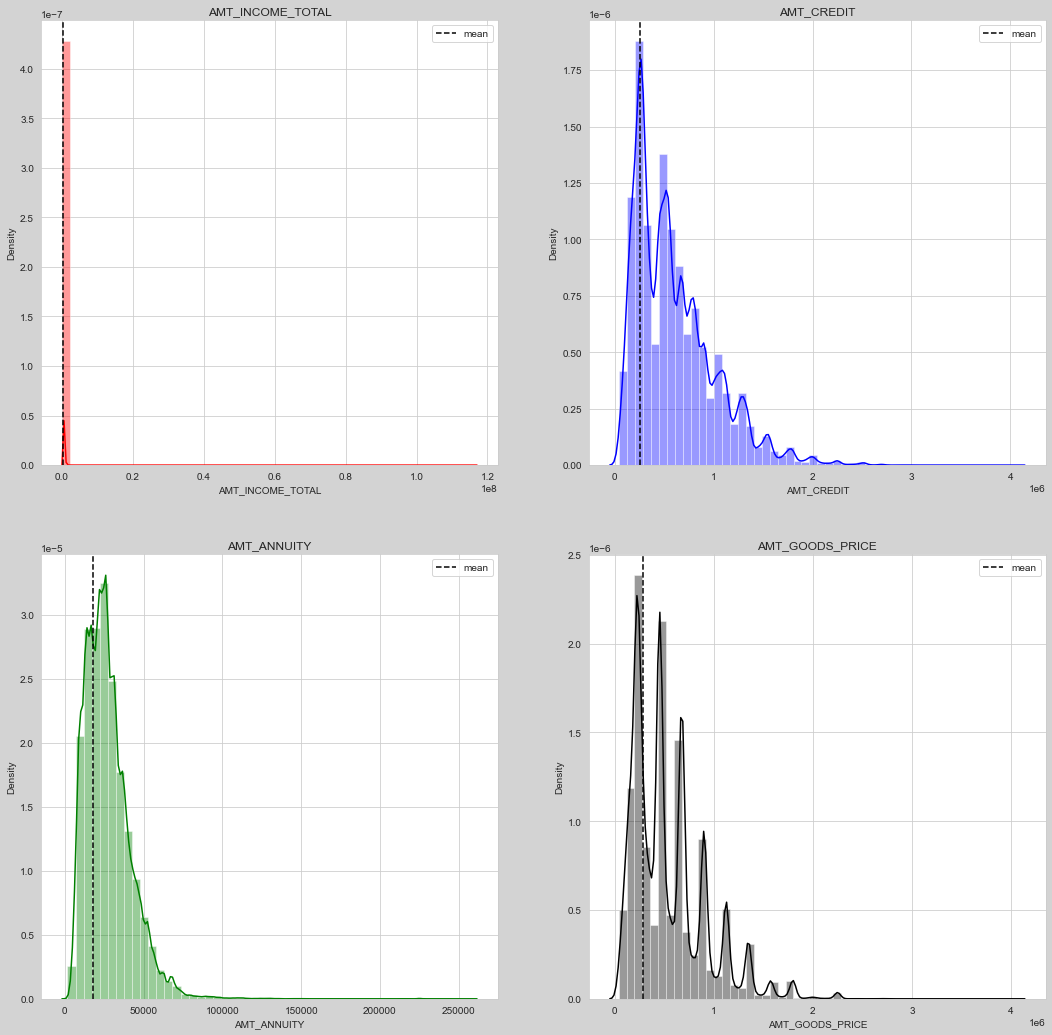

In [97]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']
length = len(cols)
cs = ["r","b","g","k"]

ax = plt.figure(figsize=(18,18))
ax.set_facecolor("lightgrey")
for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(2,2,j+1)
    sns.distplot(current_application[current_application[i].notnull()][i],color=k)
    plt.axvline(df[i].mean(),label = "mean",linestyle="dashed",color="k")
    plt.legend(loc="best")
    plt.title(i)
    plt.subplots_adjust(hspace = .2)

**5.2.4 POPULAR GOODS FOR APPLYING LOAN**
NAME_GOODS_CATEGORY - What kind of goods did the client apply for in the previous application.


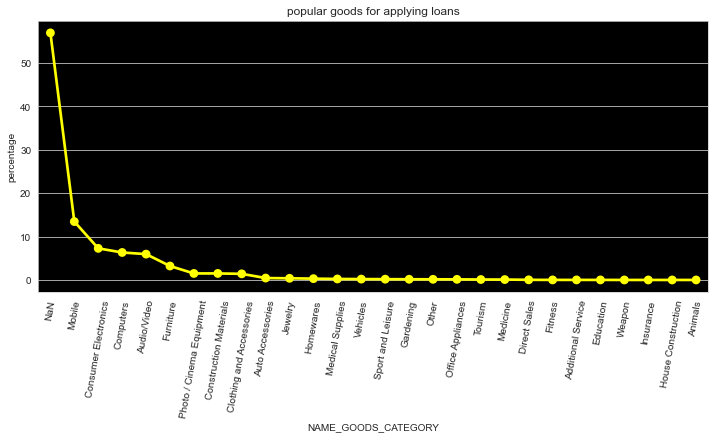

In [98]:
 previous_application["NAME_GOODS_CATEGORY"]= previous_application["NAME_GOODS_CATEGORY"].replace('XNA','NaN')
goods = previous_application["NAME_GOODS_CATEGORY"].value_counts().reset_index()
goods["percentage"] = round(goods["NAME_GOODS_CATEGORY"]*100/goods["NAME_GOODS_CATEGORY"].sum(),2)
fig = plt.figure(figsize=(12,5))
ax = sns.pointplot("index","percentage",data=goods,color="yellow")
plt.xticks(rotation = 80)
plt.xlabel("NAME_GOODS_CATEGORY")
plt.ylabel("percentage")
plt.title("popular goods for applying loans")
ax.set_facecolor("k")
fig.set_facecolor('white')

**INFERENCE:-** Mobiles ,Computers and consumer electronics are popular goods for applying loans

**5.2.5 DISTRIBUTION IN CONTRACT TYPE - PREVIOUS APPLICATION**

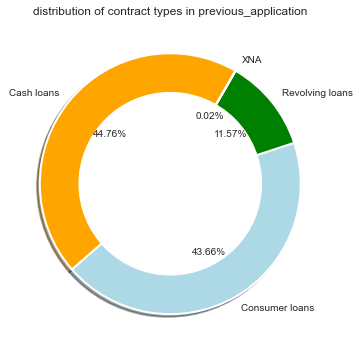

In [99]:
fig  = plt.figure(figsize=(11,6))
df[df["type"] == "previous_application"]["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.2f%%",
colors = ["orange","lightblue","green",'BLACK'],startangle = 60, wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.ylabel("")
plt.title("distribution of contract types in previous_application")
plt.show()

 **5.2.6 DISTRIBUTION OF SUITE TYPE**
    
NAME_TYPE_SUITE - Who was accompanying client when he was applying for the loan.

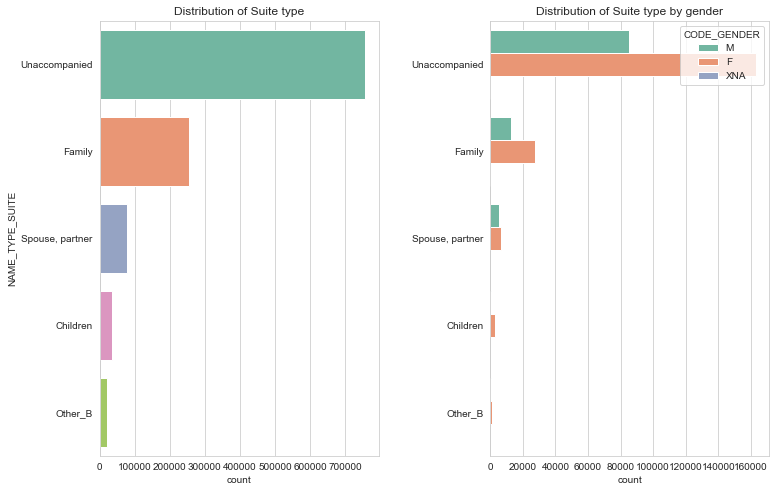

In [100]:
plt.figure(figsize=(12,8))
plt.subplot(121)
sns.countplot(y=df["NAME_TYPE_SUITE"], palette="Set2", order=df["NAME_TYPE_SUITE"].value_counts().index[:5])
plt.title("Distribution of Suite type")


plt.subplot(122)
sns.countplot(y=df["NAME_TYPE_SUITE"],hue=df["CODE_GENDER"],palette="Set2",order=df["NAME_TYPE_SUITE"].value_counts().index[:5])
plt.ylabel("")
plt.title("Distribution of Suite type by gender")
plt.subplots_adjust(wspace = .4)
plt.show()

 **INFERENCE:-*** Mostly clients unaccompanied when they were applying for the loan. Out of the total unaccompanied clients, female clients were more in number. 

**5.2.7 BIVARIATE ANALYSIS:- DISTRIBUTION OF HOUSING TYPE BY LOAN REPAYMENT SATATUS**
    NAME_HOUSING_TYPE - What is the housing situation of the client (renting, living with parents, ...)

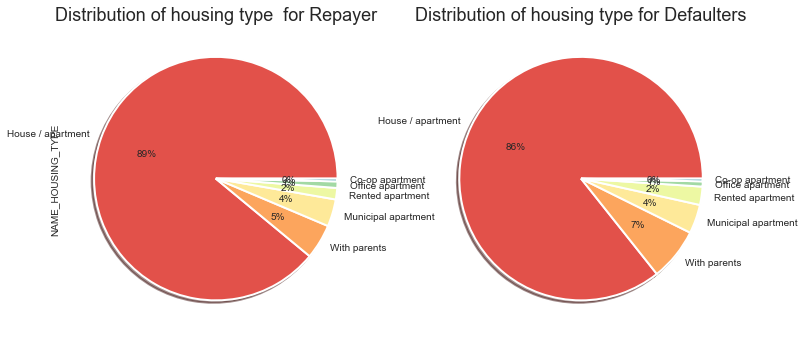

In [101]:
plt.figure(figsize=(12,12))
plt.subplot(121)
current_application[current_application["TARGET"]==0]["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",
fontsize=10, colors = sns.color_palette("Spectral"), wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of housing type  for Repayer",fontsize=18)


plt.subplot(122)
current_application[current_application["TARGET"]==1]["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",
fontsize=10, colors = sns.color_palette("Spectral"), wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
plt.title("Distribution of housing type for Defaulters",fontsize=18)
plt.ylabel("")
plt.show()

**INFERENCE:-** Defaulters are more from the clients who are living with parents than repayers.  

### 5.3 BIVARIATE ANALYSIS

**5.3.1 DIDTRIBUTION OF CONTRACT TYPE BY GENDER**


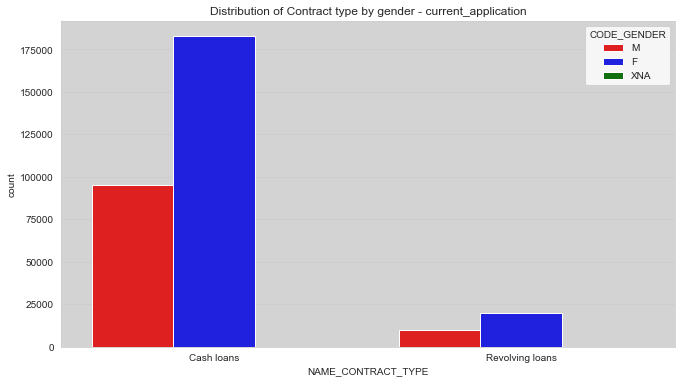

In [102]:
fig  = plt.figure(figsize=(11,6))
ax = sns.countplot("NAME_CONTRACT_TYPE",hue="CODE_GENDER",data=current_application, palette=["r","b","g"])
ax.set_facecolor("lightgrey")
ax.set_title("Distribution of Contract type by gender - current_application")
plt.show()

**INFERENCE:-** Both genders prefer cash over revolving loans. Female clients are more than male clients.

**5.3.2 SCATTER PLOT BETWEEN CREDIT AMOUNT AND ANNUITY AMOUNT**

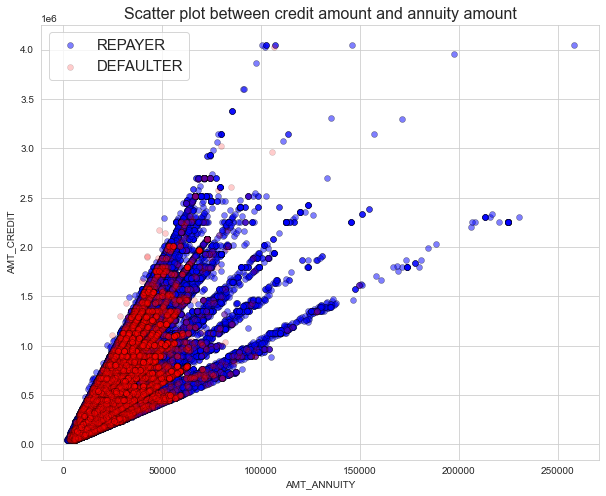

In [103]:
fig = plt.figure(figsize=(10,8))
plt.scatter(current_application[current_application["TARGET"]==0]['AMT_ANNUITY'],current_application[current_application["TARGET"]==0]['AMT_CREDIT'],s=35,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(current_application[current_application["TARGET"]==1]['AMT_ANNUITY'],current_application[current_application["TARGET"]==1]['AMT_CREDIT'],s=35,
            color="r",alpha=.2,label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot between credit amount and annuity amount", fontsize=16)
plt.show()

**5.3.3 DISTRIBUTION OF CLIENT'S AGE BY REPAYMENTS STATUS**

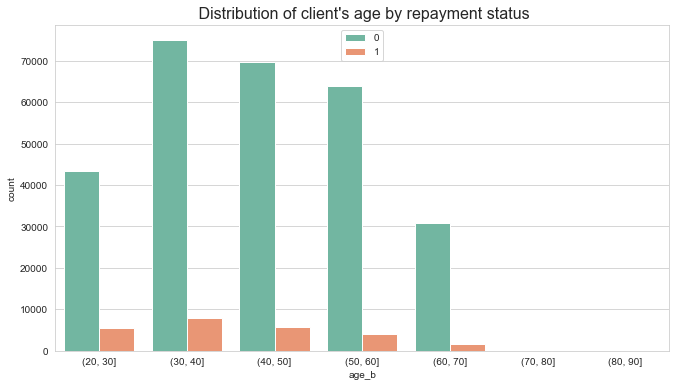

In [104]:
fig  = plt.figure(figsize=(11,6))
current_application['age']=round(current_application['DAYS_BIRTH']/365,0)
current_application['age_b']= pd.cut(x=current_application['age'], bins=[20, 30, 40, 50, 60, 70, 80, 90])
sns.countplot(current_application["age_b"],palette="Set2",hue=current_application["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of client's age by repayment status", fontsize = 16)
plt.show()


**INFERENCE:-** Client's of age group 30-40 years get the loon in maximum numbers, also they are the one who are become major part of defaulters.

**5.3.4 DISTRIBUTION OF CLIENT OWNING A CAR OR NOT BY GENDER**

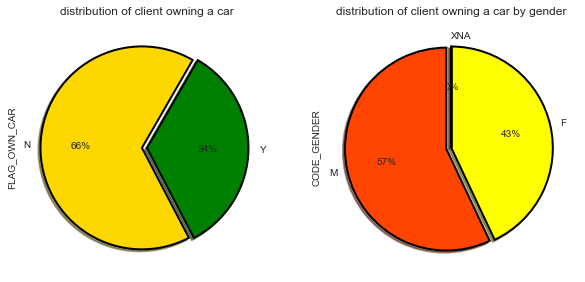

In [105]:
fig = plt.figure(figsize=(10,6))

plt.subplot(121)
df["FLAG_OWN_CAR"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["gold","green"],
startangle = 60, wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0],shadow =True)
plt.title("distribution of client owning a car")

plt.subplot(122)
df[df["FLAG_OWN_CAR"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",
colors = ["orangered","yellow"],startangle = 90,wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("distribution of client owning a car by gender")

plt.show()

**INFERENCE:-** only 34% out of total clients own a car and out of this 34% clients, 57% are males and 43% females.

 **5.3.5 DISTRIBUTION OF CLIENT OWNING A HOUSE OR A FLAT BY GENDER**

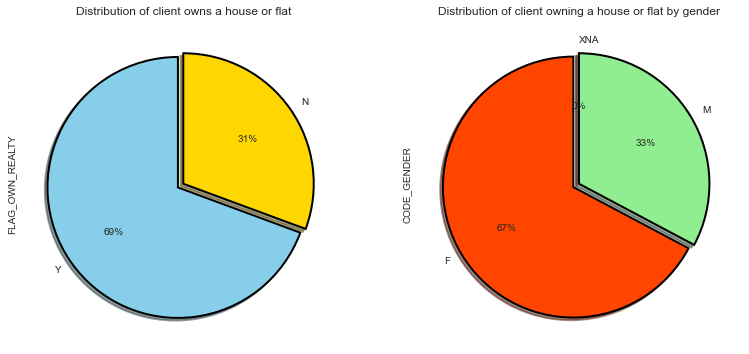

In [106]:
plt.figure(figsize=(13,6))
plt.subplot(121)
df["FLAG_OWN_REALTY"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["skyblue","gold"],
startangle = 90, wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[0.05,0],shadow =True)
plt.title("Distribution of client owns a house or flat")

plt.subplot(122)
df[df["FLAG_OWN_REALTY"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",
colors = ["orangered","lightgreen"],startangle = 90, wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of client owning a house or flat by gender")
plt.show()

**INFERENCE:-** only 31% out of total clients own house or flat and in these 31% clients 67% are female owners while 33% are male owners.

 **5.3.6 DISTRIBUTION OF NUMBER OF CHILDERN AND FAMILY OF CLIENT BY REPAYMENT STATUS**

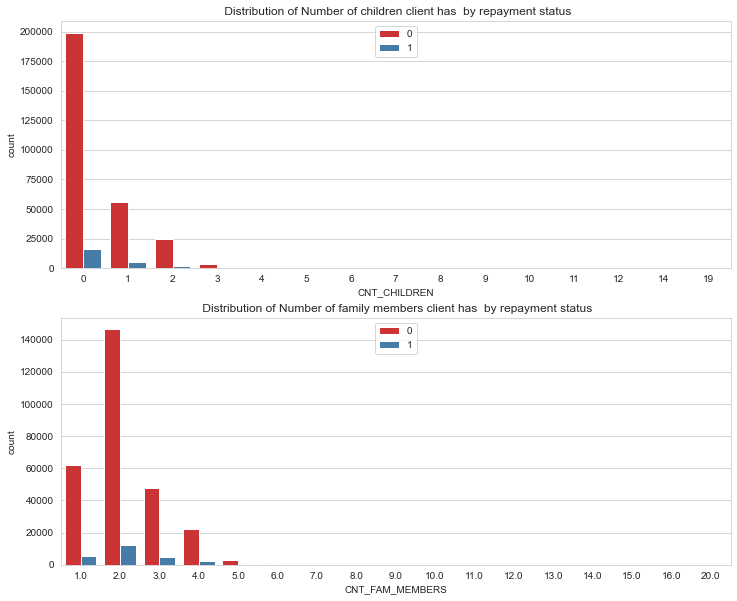

In [107]:
fig = plt.figure(figsize=(12,10))
plt.subplot(211)
sns.countplot(current_application["CNT_CHILDREN"],palette="Set1",hue=current_application["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of children client has  by repayment status")


plt.subplot(212)
sns.countplot(current_application["CNT_FAM_MEMBERS"],palette="Set1",hue=current_application["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of family members client has  by repayment status")
plt.show()

**INFERENCE:-** Most of the clients having no children whether they are defaulter or not. But majority of clients are having 2 member in the family who are getting loan, also these are the one who make large chunk of defaulter as well. 

**5.3.7 DISTRIBUTION OF SUITE TYPE**

NAME_TYPE_SUITE - Who was accompanying client when he was applying for the loan

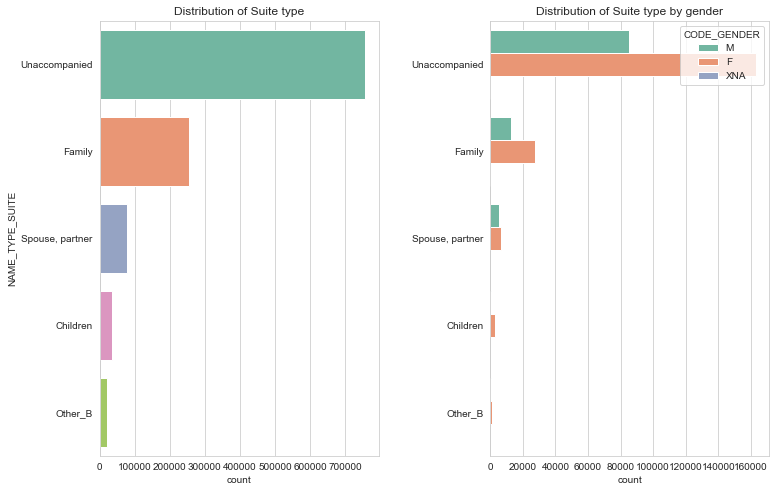

In [108]:
plt.figure(figsize=(12,8))
plt.subplot(121)
sns.countplot(y=df["NAME_TYPE_SUITE"], palette="Set2", order=df["NAME_TYPE_SUITE"].value_counts().index[:5])
plt.title("Distribution of Suite type")


plt.subplot(122)
sns.countplot(y=df["NAME_TYPE_SUITE"],hue=df["CODE_GENDER"],palette="Set2",order=df["NAME_TYPE_SUITE"].value_counts().index[:5])
plt.ylabel("")
plt.title("Distribution of Suite type by gender")
plt.subplots_adjust(wspace = .4)
plt.show()

**INFERENCE:-** Mostly clients unaccompanied when they were applying for the loan. Out of the total unaccompanied clients, female clients were more in number. 

 **5.3.8 COMPARING SUMMARY STATISTICS BETWEEN DEFAULTER AND NON-DEFAULTER FOR LOAN AMOUNT**

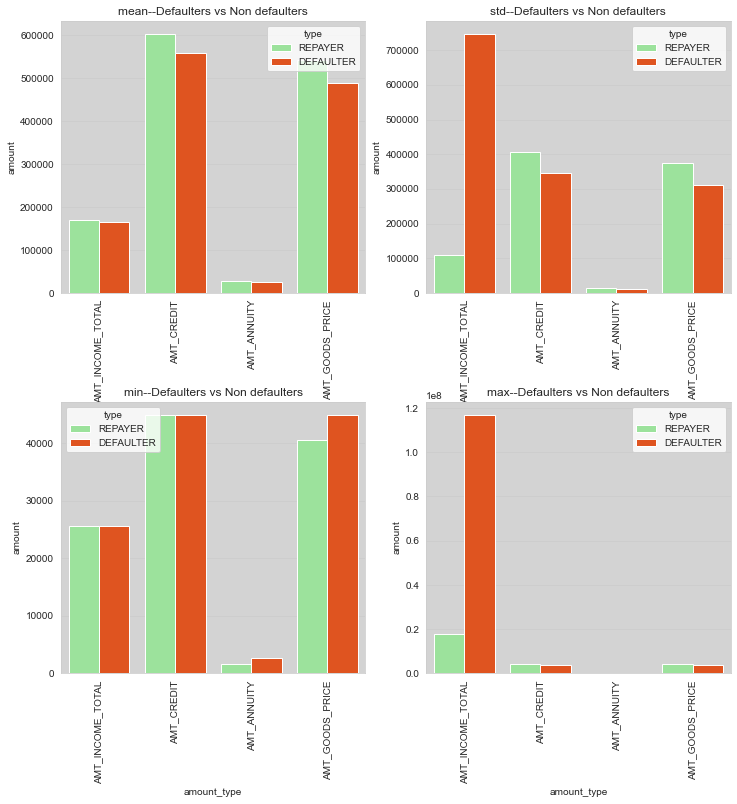

In [109]:
df1 = current_application.groupby("TARGET")[cols].describe().transpose().reset_index()
df1 = df1[df1["level_1"].isin([ 'mean', 'std', 'min', 'max'])] 
df1_x = df1[["level_0","level_1",0]]
df1_y = df1[["level_0","level_1",1]]
df1_x = df1_x.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 0:"amount"})
df1_x["type"] = "REPAYER"
df1_y = df1_y.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 1:"amount"})
df1_y["type"] = "DEFAULTER"
df1_new = pd.concat([df1_x,df1_y],axis = 0)

stat = df1_new["statistic"].unique().tolist()
length = len(stat)
plt.figure(figsize=(12,12))

for i,j in itertools.zip_longest(stat,range(length)):
    plt.subplot(2,2,j+1)
    fig = sns.barplot(df1_new[df1_new["statistic"] == i]["amount_type"],df1_new[df1_new["statistic"] == i]["amount"],
                hue=df1_new[df1_new["statistic"] == i]["type"],palette=["lightgreen","orangered"])
    plt.title(i + "--Defaulters vs Non defaulters")
    plt.subplots_adjust(hspace = .4)
    plt.xticks(rotation=90)
    fig.set_facecolor("lightgrey")


**INFERENCE**

Income of client :-
1 . Average income of clients who default and who do not are almost same.

2 . Standard deviation in income of client who default is very high compared to who do not default that, means defaulter divert his/her income into many other things as well.

3 . Clients who default also has maximum income earnings than who repay the loan.

Credit amount of the loan ,Loan annuity,Amount goods price :-
1 . Statistics between credit amounts,Loan annuity and Amount goods price given to cilents who default and who dont are almost similar.

**5.3.9 DISTRIBUTION OF CLIENT INCOME TYPE**
NAME_INCOME_TYPE Clients income type (businessman, working, maternity leave,…)

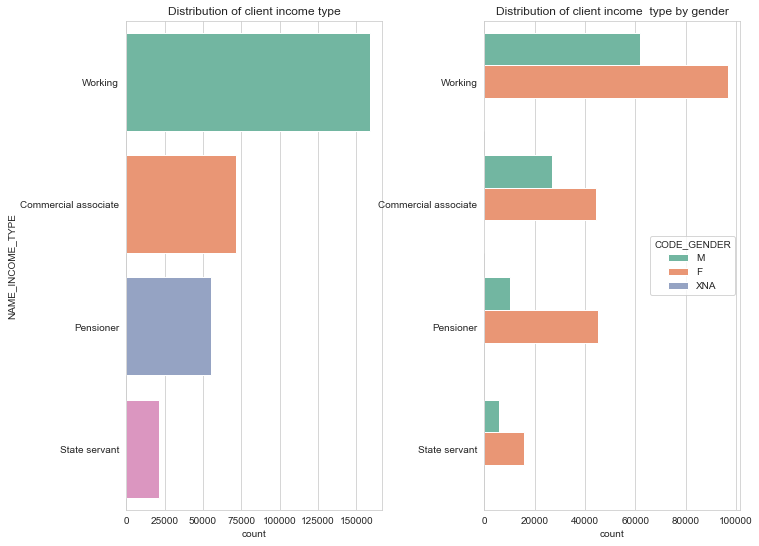

In [110]:
plt.figure(figsize=(11,9))
plt.subplot(121)
sns.countplot(y=df["NAME_INCOME_TYPE"], palette="Set2", order=df["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.title("Distribution of client income type")

plt.subplot(122)
sns.countplot(y=df["NAME_INCOME_TYPE"],hue=df["CODE_GENDER"],palette="Set2",order=df["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.ylabel("")
plt.title("Distribution of client income  type by gender")
plt.subplots_adjust(wspace = .4)
plt.show()

 **INFERENCE:-** clients applied for loan are highest from working class than commercial associate and others. also female clients are more in number than males in every income type.

**5.3.10 DISTRIBUTION OF EDUCATION TYPE BYE LOAN REPAYMENT STATUS**
NAME_EDUCATION_TYPE Level of highest education the client achieved..

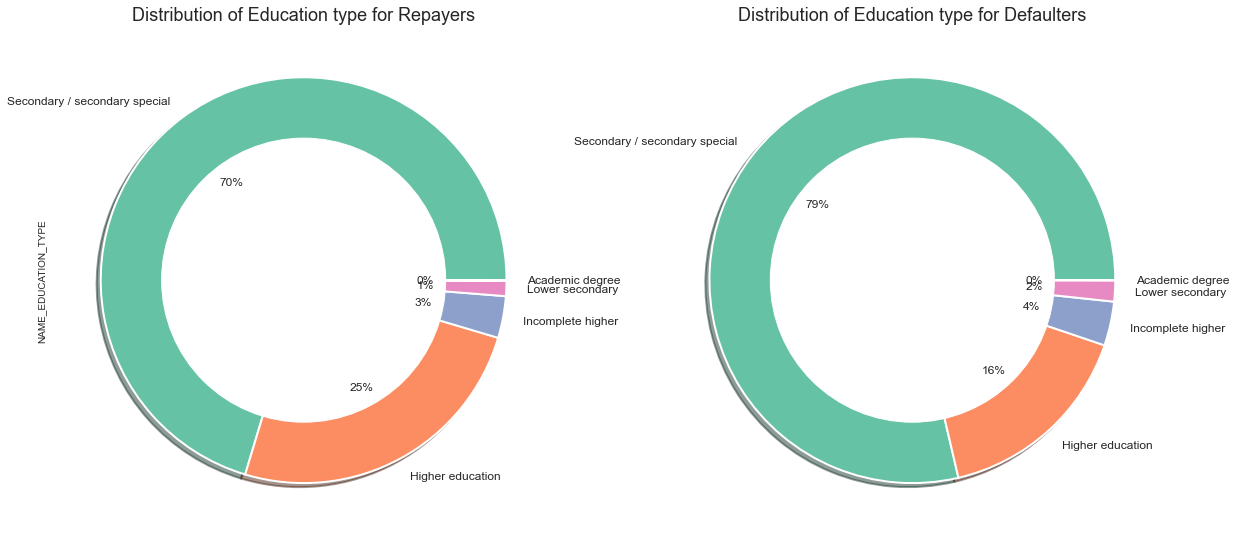

In [111]:
plt.figure(figsize=(20,20))
plt.subplot(121)
current_application[current_application["TARGET"]==0]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,
autopct = "%1.0f%%", colors = sns.color_palette("Set2"), wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Repayers", fontsize=18)


plt.subplot(122)
current_application[current_application["TARGET"]==1]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,
autopct = "%1.0f%%", colors = sns.color_palette("Set2"),wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Defaulters", fontsize=18)
plt.ylabel("")
plt.show()

**INFERENCE:-** Clients who default have proportionally 9% less higher education compared to clients who do not default.

**5.3.11 DISTRIBUTION OF FAMILY STATUS TYE BY LOAN REPAYMENT STATUS**
NAME_FAMILY_STATUS - Family status of the client

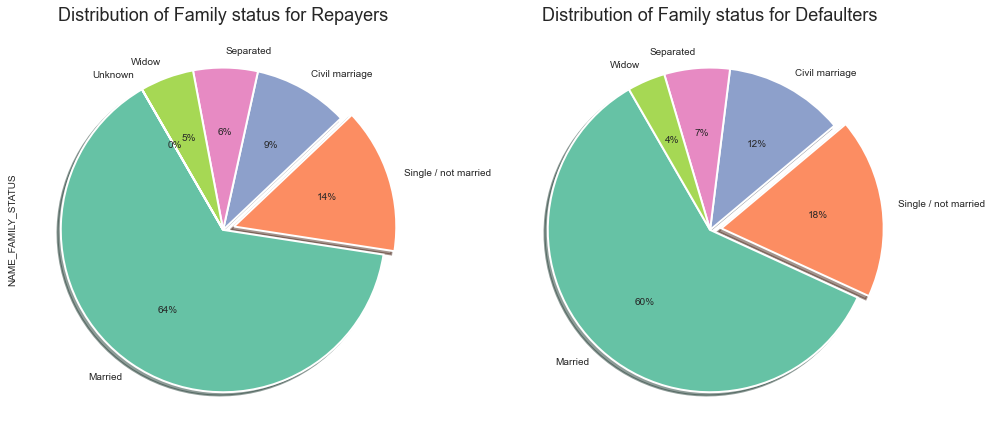

In [112]:
plt.figure(figsize=(16,8))
plt.subplot(121)
current_application[current_application["TARGET"]==0]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
startangle=120,colors = sns.color_palette("Set2",7), wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True,explode=[0,.07,0,0,0,0])

plt.title("Distribution of Family status for Repayers",fontsize=18)


plt.subplot(122)
current_application[current_application["TARGET"]==1]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
 startangle=120,colors = sns.color_palette("Set2",7), wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True,explode=[0,.07,0,0,0])

plt.title("Distribution of Family status for Defaulters", fontsize=18)
plt.ylabel("")
plt.show()

**INFERENCE:-**Percentage of single people and Civil marriage are more in defaulters than others.

**5.3.12 DISTRIBUTION OF DAYS EMPLOYED FOR TARGET VARABLE**
DAYS_EMPLOYED - How many days before the application for target variable the person started current employment



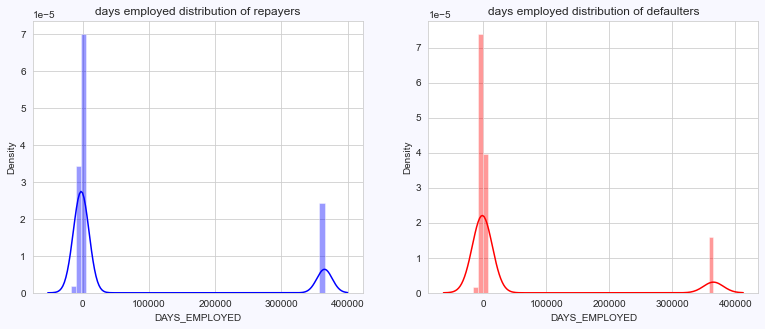

In [113]:
fig = plt.figure(figsize=(13,5))

plt.subplot(121)
sns.distplot(current_application[current_application["TARGET"]==0]["DAYS_EMPLOYED"],color="b")
plt.title("days employed distribution of repayers")

plt.subplot(122)
sns.distplot(current_application[current_application["TARGET"]==1]["DAYS_EMPLOYED"],color="r")
plt.title("days employed distribution of defaulters")

fig.set_facecolor("ghostwhite")
plt.show()

**INFERENCE:-** Highest number of clients are from the first 5 years of their career and second highest are from the last years of their career. 

**5.3.13 DISTRIBUTION IN ORGANISATION TYPES OF REPAYERS AND DEFAULTERS**
ORGANIZATION_TYPE - Type of organization where client works.

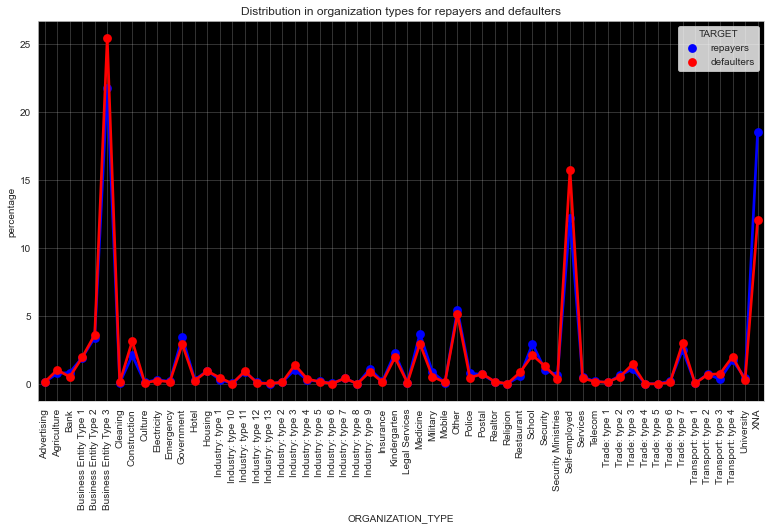

In [114]:
org = current_application.groupby("TARGET").agg({"ORGANIZATION_TYPE":"value_counts"})
org = org.rename(columns = {"ORGANIZATION_TYPE":"value_counts"}).reset_index()
org_0 = org[org["TARGET"] == 0]
org_1 = org[org["TARGET"] == 1]
org_0["percentage"] = org_0["value_counts"]*100/org_0["value_counts"].sum()
org_1["percentage"] = org_1["value_counts"]*100/org_1["value_counts"].sum()

organization = pd.concat([org_0,org_1],axis=0)
organization = organization.sort_values(by="ORGANIZATION_TYPE",ascending=True)

organization["TARGET"] = organization["TARGET"].replace({0:"repayers",1:"defaulters"})
organization
plt.figure(figsize=(13,7))
ax = sns.pointplot("ORGANIZATION_TYPE","percentage", data=organization,hue="TARGET",palette=["b","r"])
plt.xticks(rotation=90)
plt.grid(True,alpha=.3)
ax.set_facecolor("k")
ax.set_title("Distribution in organization types for repayers and defaulters")
plt.show()

**INFERENCE:-** Business Entity Type 3 organization grab highest percentage of loans after that self-employed and then others.

**5.3.14. DISTRIBUTION CLIENTS'S SOCIAL SROUNDINGS WITH OBESERVED AND DEFAULTED 30 DPS**
OBS_30_CNT_SOCIAL_CIRCLE- How many observation of client's social surroundings with observable 30 DPD (days past due) default.

DEF_30_CNT_SOCIAL_CIRCLE-How many observation of client's social surroundings defaulted on 30 DPD (days past due) .

OBS_60_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings with observable 60 DPD (days past due) default.

DEF_60_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings defaulted on 60 (days past due) DPD.

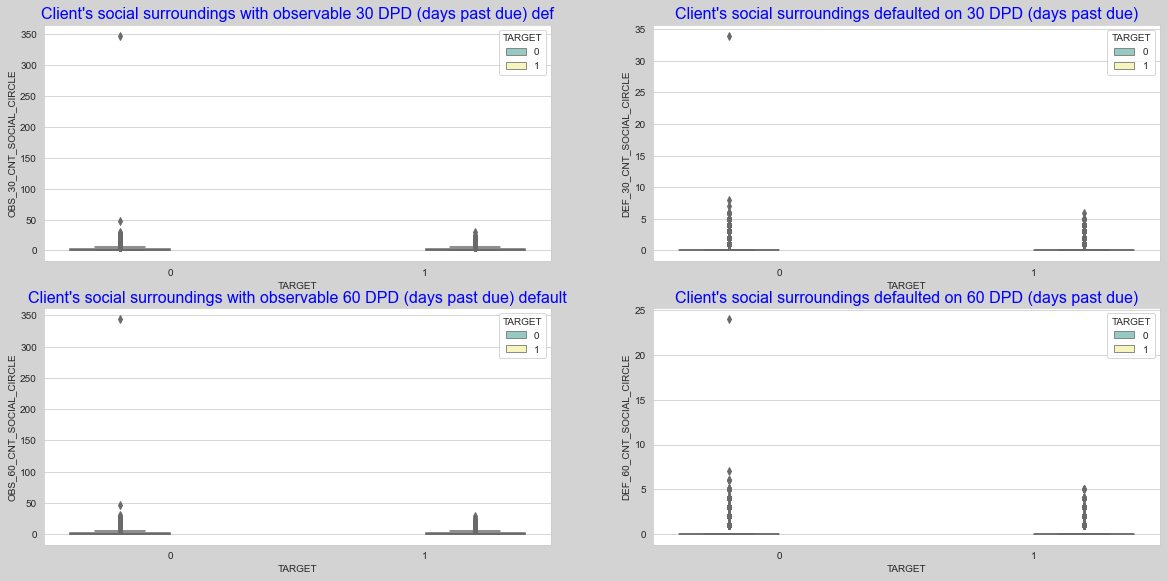

In [115]:
fig = plt.figure(figsize=(20,20))
plt.subplot(421)
sns.boxplot(data=current_application,x='TARGET',y='OBS_30_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set3")
plt.title("Client's social surroundings with observable 30 DPD (days past due) def",color="b",fontsize=16)
plt.subplot(422)
sns.boxplot(data=current_application,x='TARGET',y='DEF_30_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set3")
plt.title("Client's social surroundings defaulted on 30 DPD (days past due)",color="b",fontsize=16)
plt.subplot(423)
sns.boxplot(data=current_application,x='TARGET',y='OBS_60_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set3")
plt.title("Client's social surroundings with observable 60 DPD (days past due) default",color="b",fontsize=16)
plt.subplot(424)
sns.boxplot(data=current_application,x='TARGET',y='DEF_60_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set3")
plt.title("Client's social surroundings defaulted on 60 DPD (days past due)",color="b", fontsize=16)
fig.set_facecolor("lightgrey")
plt.show()

**INFERENCE:-** People after becoming defaulter tend to get less social than they were earlier useed to.

**5.3.15 TOTAL AND AVERAGE AMOUNT APPLIED AND CREDITED IN PREVIOUS APPLICATION**
 AMT_APPLICATION-For how much credit did client ask on the previous application.>AMT_CREDIT-Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client.

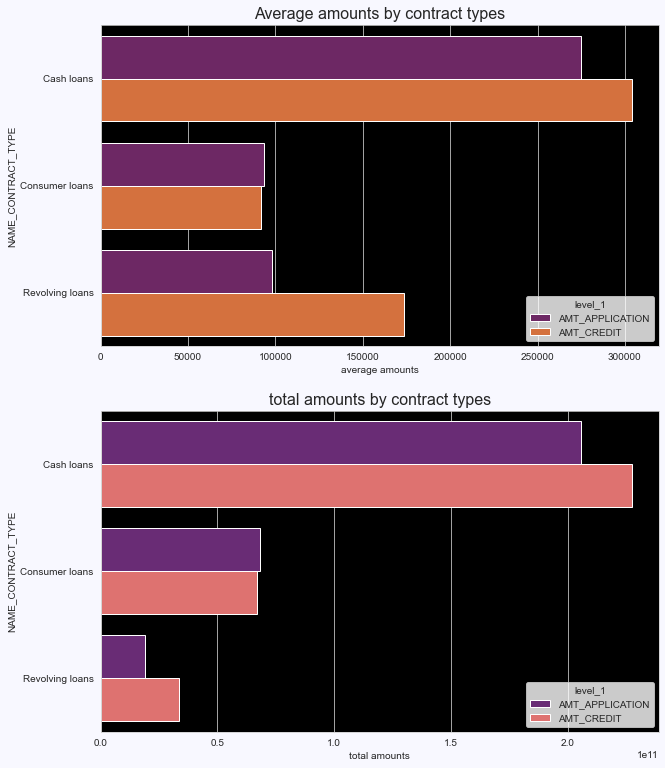

In [116]:
mn = previous_application.groupby("NAME_CONTRACT_TYPE")[["AMT_APPLICATION","AMT_CREDIT"]].mean().stack().reset_index()
tt = previous_application.groupby("NAME_CONTRACT_TYPE")[["AMT_APPLICATION","AMT_CREDIT"]].sum().stack().reset_index()
fig = plt.figure(figsize=(10,13))
fig.set_facecolor("ghostwhite")

plt.subplot(211)
ax = sns.barplot(0,"NAME_CONTRACT_TYPE",data=mn[:6],hue="level_1",palette="inferno")
ax.set_facecolor("k")
ax.set_xlabel("average amounts")
ax.set_title("Average amounts by contract types", fontsize=16)

plt.subplot(212)
ax1 = sns.barplot(0,"NAME_CONTRACT_TYPE",data=tt[:6],hue="level_1",palette="magma")
ax1.set_facecolor("k")
ax1.set_xlabel("total amounts")
ax1.set_title("total amounts by contract types", fontsize=16)
plt.subplots_adjust(hspace = .2)
plt.show()

**INFERENCE:-** Total as well as Average Amount of credit is more than the Amount of application in Cash loan contracts and revolving loan contracts while they are less in consumer loan contracts.

**5.3.16 COUNT OF APPLICATION STATUS BY APPLICATION TYPE**
NAME_CONTRACT_TYPE -Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application.
NAME_CONTRACT_STATUS -Contract status (approved, cancelled, ...) of previous application.

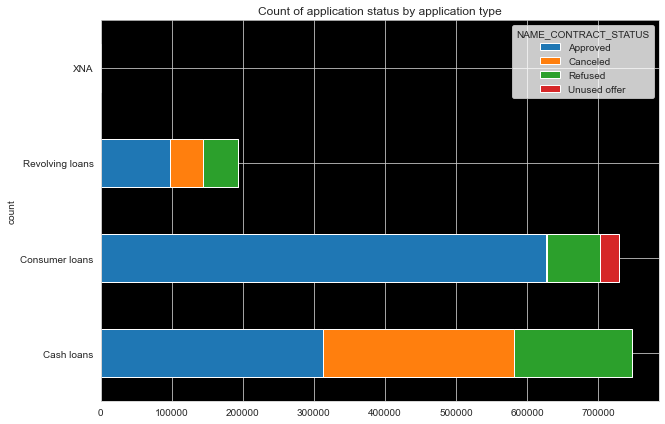

In [117]:
ax = pd.crosstab(previous_application["NAME_CONTRACT_TYPE"],previous_application["NAME_CONTRACT_STATUS"]).plot(kind="barh",figsize=(10,7),stacked=True)
plt.xticks(rotation =0)
plt.ylabel("count")
plt.title("Count of application status by application type")
ax.set_facecolor("k")

**INFERENCE:-** Consumer loan applications are most approved loans and cash loans are most cancelled and refused loans.

**5.3.17 CLIENT PAYMENT METHOD AND REASONS FOR APPLICATION REJECTION**
NAME_PAYMENT_TYPE - Payment method that client chose to pay for the previous application.

CODE_REJECT_REASON - Why was the previous application rejected.

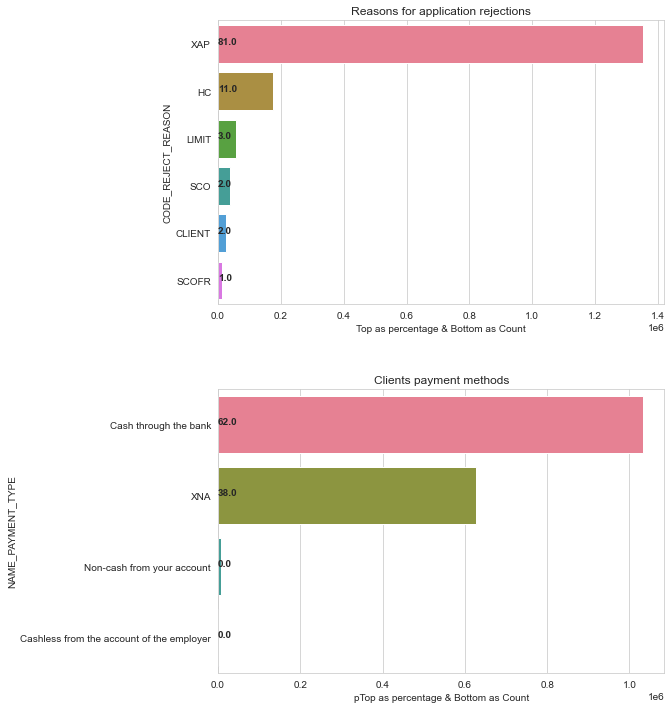

In [118]:
plt.figure(figsize=(8,12))
plt.subplot(211)
rej = previous_application["CODE_REJECT_REASON"].value_counts().reset_index()
ax = sns.barplot("CODE_REJECT_REASON","index",data=rej[:6],palette="husl")
for i,j in enumerate(np.around((rej["CODE_REJECT_REASON"][:6].values*100/(rej["CODE_REJECT_REASON"][:6].sum())))):
    ax.text(.7,i,j,weight="bold")
plt.xlabel("Top as percentage & Bottom as Count")
plt.ylabel("CODE_REJECT_REASON")
plt.title("Reasons for application rejections")

plt.subplot(212)
pay = previous_application["NAME_PAYMENT_TYPE"].value_counts().reset_index()
ax1 = sns.barplot("NAME_PAYMENT_TYPE","index",data=pay,palette="husl")
for i,j in enumerate(np.around((pay["NAME_PAYMENT_TYPE"].values*100/(pay["NAME_PAYMENT_TYPE"].sum())))):
    ax1.text(.7,i,j,weight="bold")
plt.xlabel("pTop as percentage & Bottom as Count")
plt.ylabel("NAME_PAYMENT_TYPE")
plt.title("Clients payment methods")
plt.subplots_adjust(hspace = .3)


**INFERENCE:-**
1.  Around 81% of rejected applications the reason is XAP.

2.  62% of chose to pay through cash by bank for previous applications.

**5.3.18 DISTRIBUTION IN CLIENT SUITE TYPE AND CLIENT TYPE**
NAME_TYPE_SUITE - Who accompanied client when applying for the previous application.

NAME_CLIENT_TYPE - Was the client old or new client when applying for the previous application.

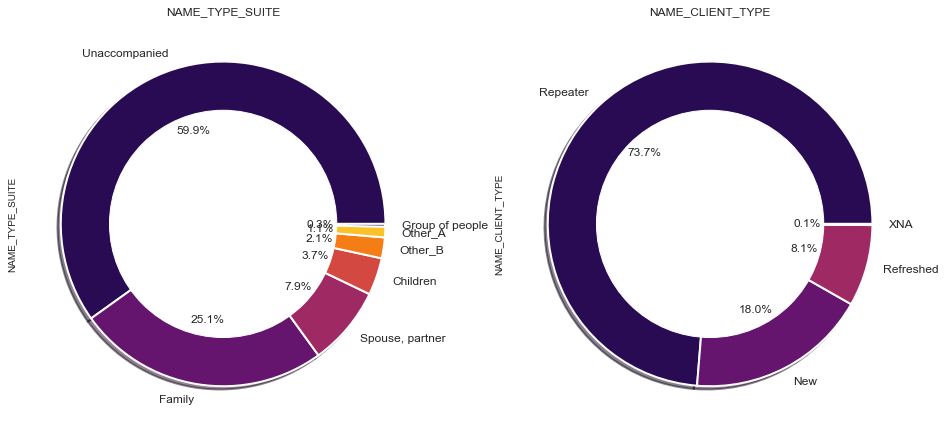

In [119]:
plt.figure(figsize=(16,16))
plt.subplot(121)
previous_application["NAME_TYPE_SUITE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12, colors = sns.color_palette("inferno"),
    wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("NAME_TYPE_SUITE")


plt.subplot(122)
previous_application["NAME_CLIENT_TYPE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12, colors = sns.color_palette("inferno"),
  wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("NAME_CLIENT_TYPE")
plt.show()

**INFERENCE:-**  About 60% clients are un-accompained when applying for loans.

73% clients are old clients

### 5.4 MULTIVARIATE ANALYSIS

**5.4.1 AVERAGE INCOME, CREDIT ANNUITY & GOODS_PRICE BY GENDER**

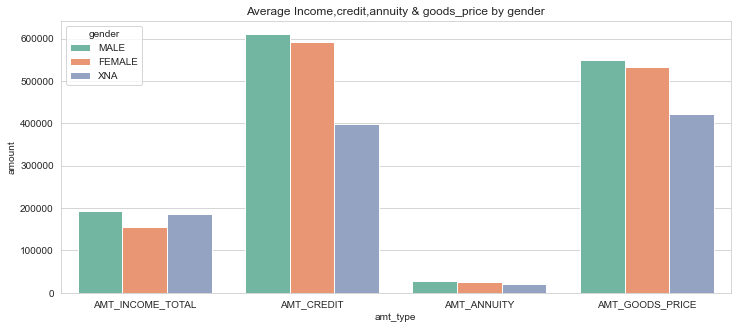

In [120]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']

df2 = df.groupby("CODE_GENDER")[cols].mean().transpose().reset_index()

df_f   = df2[["index","F"]]
df_f   = df_f.rename(columns={'index':"amt_type", 'F':"amount"})
df_f["gender"] = "FEMALE"
df_m   = df2[["index","M"]]
df_m   = df_m.rename(columns={'index':"amt_type", 'M':"amount"})
df_m["gender"] = "MALE"
df_xna = df2[["index","XNA"]]
df_xna = df_xna.rename(columns={'index':"amt_type", 'XNA':"amount"})
df_xna["gender"] = "XNA"

df_gen = pd.concat([df_m,df_f,df_xna],axis=0)

plt.figure(figsize=(12,5))
ax = sns.barplot("amt_type","amount",data=df_gen,hue="gender",palette="Set2")
plt.title("Average Income,credit,annuity & goods_price by gender")
plt.show()

**INFERENCE:-** 
    1. Average income is highest for male and least for female.
    2. Amount of credit, annuity and Amount of goods price all are again highest for male.
    

**5.4.2 DISTRIBUTION OF CONTRACT TYPE, GENDER, OWN CAR, OWN HOUSE WITH RESPECT TO REPAYMENT STATUS(TARGET VARIABLE)**

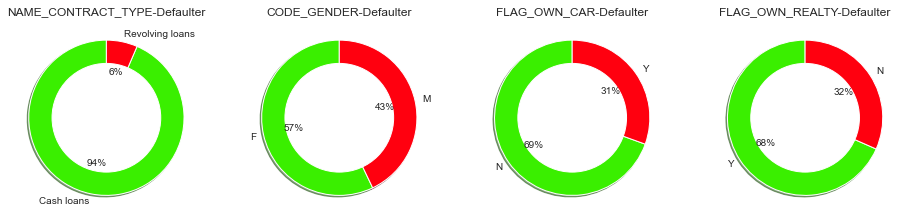

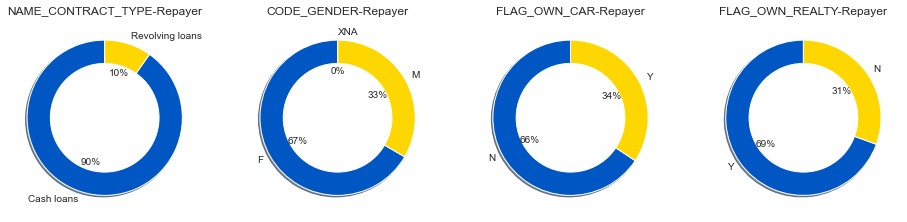

In [121]:
default = current_application[current_application["TARGET"]==1][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]
non_default = current_application[current_application["TARGET"]==0][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]

d_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
d_length = len(d_cols)

fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism"),
    startangle = 90, wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Defaulter")


fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    non_default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",3),startangle = 90,
                                           wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Repayer")

**INFERENCE:-** 1. Percentage of revolving loans are less in defaulters than repayers.
                  2. Percentage of males is 10% more in defaulters category than repayers.
                  3. Percentage of car owners is less in defaulter than repayers.
                  4. Percentage of house owners is less in defaulter than repayers.

**5.4.3 AVERAGE EARNINGS BY DIFFERENT PROFESSIONS AND EDUCATIONS TYPE**

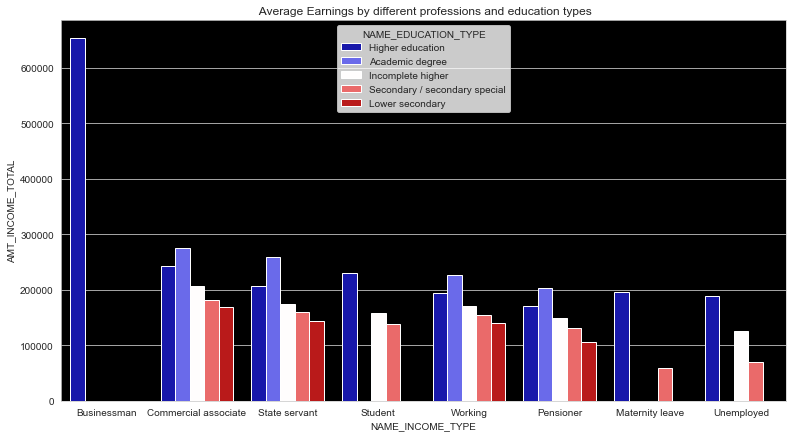

In [122]:
edu = df.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index().sort_values(
      by='AMT_INCOME_TOTAL',ascending=False)
fig = plt.figure(figsize=(13,7))
ax = sns.barplot('NAME_INCOME_TYPE','AMT_INCOME_TOTAL',data=edu,hue='NAME_EDUCATION_TYPE',palette="seismic")
ax.set_facecolor("k")
plt.title(" Average Earnings by different professions and education types")
plt.show()

**INFERENCE:-** Businessman clients are having higher education only, while in other categories of income type clients with academic degrees are more. But Students mainly apply for loan for higher education.

**5.4.4 PAIR PLOT BETWEEN AMOUNT VARIABLE**

AMT_INCOME_TOTAL - Income of the client

AMT_CREDIT - Credit amount of the loan

AMT_ANNUITY - Loan annuity

AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which the loan is given

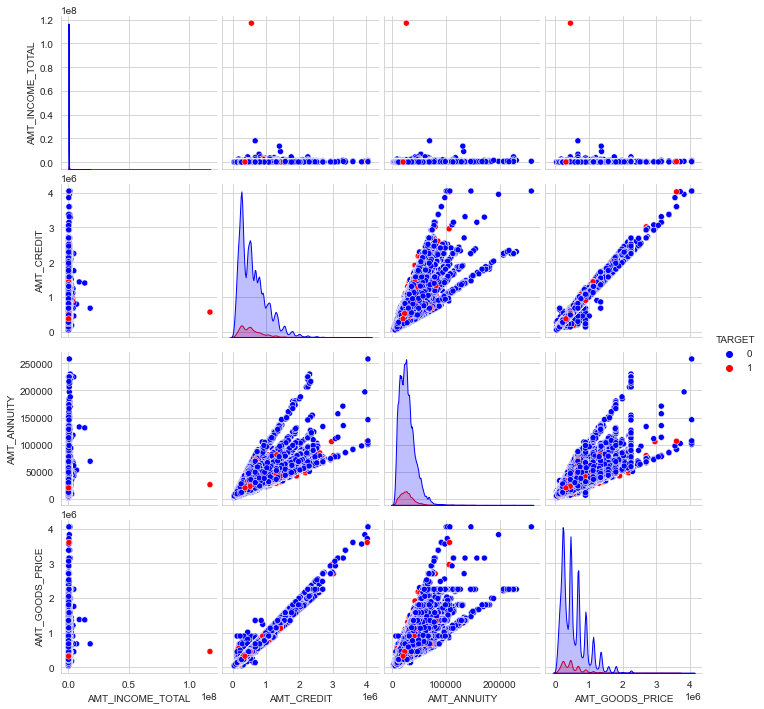

In [123]:
amt = current_application[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE',"TARGET"]]
amt = amt[(amt["AMT_GOODS_PRICE"].notnull()) & (amt["AMT_ANNUITY"].notnull())]
sns.pairplot(amt,hue="TARGET",palette=["b","r"])
plt.show()


**5.4.5 CORRELATION BETWEEN VARIABLES**

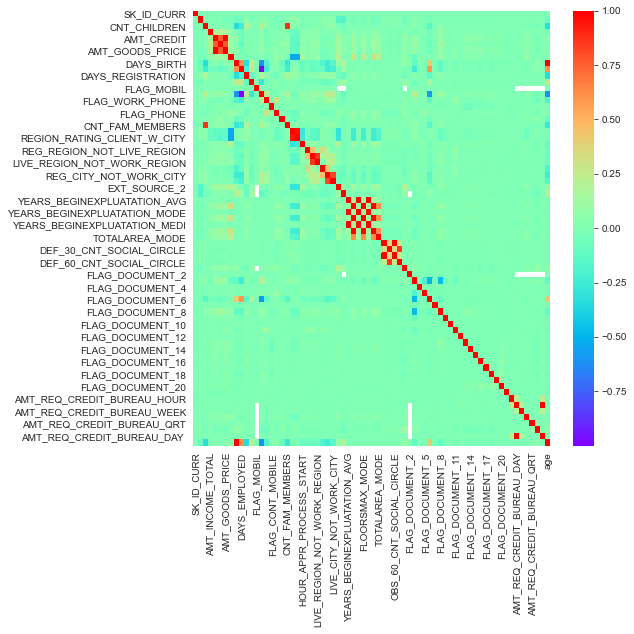

In [124]:
# plotting correlation for Current application data 
corrmat = current_application.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()

**INFERENCE:-** count family members and children shows highest correlation between them.

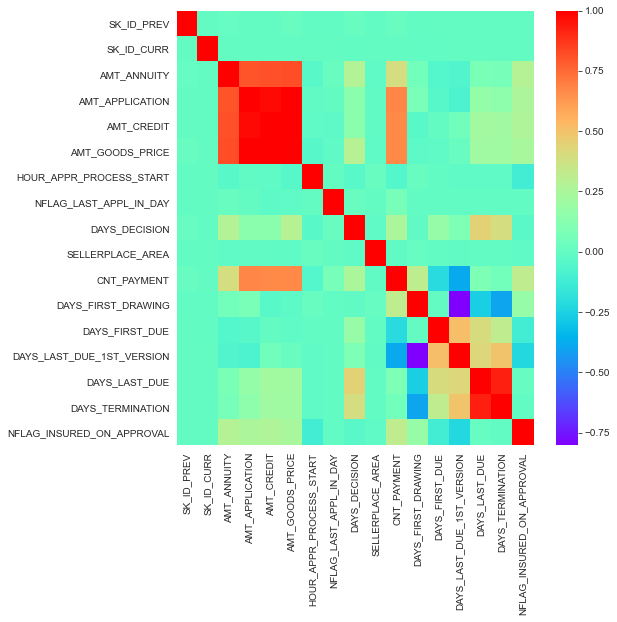

In [125]:
# Plotting correlation for previous application data
corrmat = previous_application.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()

**INFERENCE:-** Count Payment and Amount of application, credit, goods price have high correlation among them.

## 6.CONCLUSION

1. Banks should focus on small family sized clients, as there will be less diversion of funds and more chances of repayment.

2. Banks should be more careful while approving loans for business entities, self-employed, industry and trade sector, as their percentage of default is higher than repayment. on the other hand sectors like medicine, government, schools etc have higher percentage of repayment.

3. banks need to avoid income type of 'Working' clients as they have high percentage of paying difficulties. Instead focus on Commercial associate, pensioner and State servant.

4. Banks should focus more on education type 'Higher education' and avoid Secondary/secondary special, incomplete higher or lower secondary as they face paying difficulties.

5. People with high income status have more deviation in income and also are maximum defaulters than the corresponding low and middle income clients.